In [223]:
from urllib.request import urlopen
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup
import pandas as pd 
import squarify as sq
import numpy as np

1. (4 points) Scrape the "Current State of the Race" table (first table) from the NYT webpage.


In [4]:
html=urlopen('https://www.nytimes.com/interactive/2020/us/elections/democratic-polls.html')
bs=BeautifulSoup(html)

In [5]:
print(bs.prettify())

8","last_date_included":"2019-08-24","days_included":7,"is_full_week":true,"announced_this_week":false},{"slug":"steyer","short_name":"Steyer","week":35,"total":166,"first_date_included":"2019-08-25","last_date_included":"2019-08-31","days_included":7,"is_full_week":true,"announced_this_week":false},{"slug":"steyer","short_name":"Steyer","week":36,"total":25,"first_date_included":"2019-09-01","last_date_included":"2019-09-07","days_included":7,"is_full_week":true,"announced_this_week":false},{"slug":"steyer","short_name":"Steyer","week":37,"total":29,"first_date_included":"2019-09-08","last_date_included":"2019-09-14","days_included":7,"is_full_week":true,"announced_this_week":false},{"slug":"steyer","short_name":"Steyer","week":38,"total":13,"first_date_included":"2019-09-15","last_date_included":"2019-09-21","days_included":7,"is_full_week":true,"announced_this_week":false},{"slug":"steyer","short_name":"Steyer","week":39,"total":18,"first_date_included":"2019-09-22","last_date_inclu

In [114]:
column=[bs.find('table').thead.find_all('tr')[0].find_all('th')[0].text.replace('\n','').replace('*','').rstrip()]
column=column+[var.find_all('span',{'class':"g-desktop-label"})[0].text.replace('\n','').replace('*','').replace('†','') for var in bs.find('table').thead.find_all('tr')[0].find_all('th')[1:]]

In [115]:
row=[]
for i in range(len(bs.find('table').tbody.find_all('tr'))-1):
    row.append([bs.find('table').tbody.find_all('tr')[i].find_all('td')[0].find_all('span',{'class':"g-desktop"})[0].text.rstrip()]+[var.text.rstrip() for var in bs.find('table').tbody.find_all('tr')[i].find_all('td')[1:]])

In [119]:
df=pd.DataFrame(row,columns=column)
df

,Qualified for the November debate,National polling average,Individual contributions,Weekly news coverage
0,Joseph R. Biden Jr.,26%,$37.6m,#1
1,Elizabeth Warren,20%,$49.8m,#2
2,Bernie Sanders,17%,$61.5m,#3
3,Pete Buttigieg,8%,$51.5m,#4
4,Kamala Harris,4%,$35.5m,#5
5,Andrew Yang,3%,$15.1m,#11
6,Amy Klobuchar,2%,$13.9m,#6
7,Cory Booker,2%,$15.5m,#9
8,Tulsi Gabbard,1%,$6.5m,#8
9,Tom Steyer,< 1%,$2.0m,#6


2. (2 points) Clean the scrapped data to make sure that the all the variables ("National
Polling Average", "Individual Contributions", "Weekly News Coverage") are numeric.

In [131]:
me=lambda x: '1%' if (x.find('<')>-1) else x
df['National polling average']=df['National polling average'].apply(me).apply(lambda x: pd.to_numeric(x[:-1]))

In [138]:
df['Individual contributions']=df['Individual contributions'].apply(lambda x:pd.to_numeric(x[x.find('$')+1:x.find('m')])*1000000)

In [141]:
df['Weekly news coverage']=df['Weekly news coverage'].apply(lambda x: pd.to_numeric(x[1:]))

In [142]:
df

,Qualified for the November debate,National polling average,Individual contributions,Weekly news coverage
0,Joseph R. Biden Jr.,26,37600000.0,1
1,Elizabeth Warren,20,49800000.0,2
2,Bernie Sanders,17,61500000.0,3
3,Pete Buttigieg,8,51500000.0,4
4,Kamala Harris,4,35500000.0,5
5,Andrew Yang,3,15100000.0,11
6,Amy Klobuchar,2,13900000.0,6
7,Cory Booker,2,15500000.0,9
8,Tulsi Gabbard,1,6500000.0,8
9,Tom Steyer,1,2000000.0,6


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
Qualified for the November debate    17 non-null object
National polling average             17 non-null int64
Individual contributions             17 non-null float64
Weekly news coverage                 17 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 672.0+ bytes


3. (2 points) Create a dot plot that shows the top candidates who have more than 2%
support. (Please note that your graph might not look exactly the same in case NYT
updated the polls before next week)


In [179]:
qualified=df[df['National polling average']>2].sort_values('National polling average').reset_index()
color=['blue' if (x>=len(qualified.index)-3) else 'grey' for x in qualified.index]

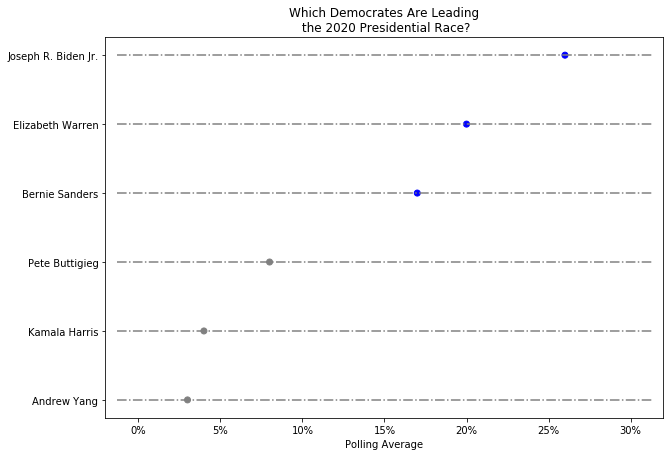

In [196]:
plt.figure(figsize=(10,7))
plt.scatter('National polling average','Qualified for the November debate',data=qualified,marker='o',color=color)
for i in range(len(qualified['Qualified for the November debate'])):
    plt.axhline(y=qualified['Qualified for the November debate'][i],linestyle='dashdot',xmax=0.98,xmin=0.02,color='grey')

ax=plt.gca()
plt.xlim((-2,32))
plt.xticks([0,5,10,15,20,25,30])
ax.set_xticklabels(['0%','5%','10%','15%','20%','25%','30%'])
plt.xlabel('Polling Average')
plt.title('Which Democrates Are Leading\n the 2020 Presidential Race?')
plt.show()

4. (2 points) Create a tree map as follows. The percentage for each candidate is out of the
total money received by the candidates who has at least 2% polling average.

In [198]:
qualified=df[df['National polling average']>=2].sort_values('National polling average').reset_index()
total=qualified['Individual contributions'].sum()
qualified['rate']=qualified['Individual contributions']/total
qualified['label']=qualified['rate']

In [224]:
label=qualified.apply(lambda x:x['Qualified for the November debate']+'\n ('+str(round(x['rate']*100))+'%)',axis=1)
colors=plt.get_cmap('Spectral')(np.linspace(0,1,len(label)))

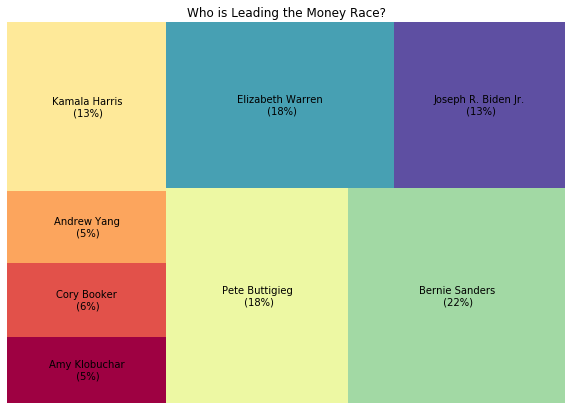

In [230]:
plt.figure(figsize=(10,7))
sq.plot(sizes=qualified['rate'],label=label,color=colors)
plt.axis('off')
plt.title('Who is Leading the Money Race?')
plt.show()